In [2]:
import collections
import numpy as np
import timeit
import time
import random



# Let's create a list of indexes

In [3]:
sz = 10
nums = [x for x in range(sz)]
print (nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Now we shuffle them

In [4]:
random.seed(1)
random.shuffle(nums)
random.shuffle(nums)

print (nums)

[5, 1, 9, 0, 3, 2, 6, 4, 8, 7]


# Now let's make a list and an array

In [5]:
lst = collections.deque(nums)
arr = np.array(nums)
print (lst)
print (arr)

deque([5, 1, 9, 0, 3, 2, 6, 4, 8, 7])
[5 1 9 0 3 2 6 4 8 7]


In [6]:
def traverse( thing, times):
    idx = 0
    for i in range(times):
        nidx = thing[idx]
        print (i, ':', idx, '->', nidx)
        idx = nidx

In [7]:
trips = 10
traverse(lst, trips)

0 : 0 -> 5
1 : 5 -> 2
2 : 2 -> 9
3 : 9 -> 7
4 : 7 -> 4
5 : 4 -> 3
6 : 3 -> 0
7 : 0 -> 5
8 : 5 -> 2
9 : 2 -> 9


In [8]:
start_time = time.time()
traverse(lst, trips)
end_time = time.time()

# at the end of the program:
print("True List: %f seconds" % (end_time - start_time))

start_time = time.time()
traverse(arr, trips)
end_time = time.time()

# at the end of the program:
print("Array: %f seconds" % (end_time - start_time))

0 : 0 -> 5
1 : 5 -> 2
2 : 2 -> 9
3 : 9 -> 7
4 : 7 -> 4
5 : 4 -> 3
6 : 3 -> 0
7 : 0 -> 5
8 : 5 -> 2
9 : 2 -> 9
True List: 0.002148 seconds
0 : 0 -> 5
1 : 5 -> 2
2 : 2 -> 9
3 : 9 -> 7
4 : 7 -> 4
5 : 4 -> 3
6 : 3 -> 0
7 : 0 -> 5
8 : 5 -> 2
9 : 2 -> 9
Array: 0.001520 seconds


In [9]:
def traverse( thing, times):
    idx = 0
    for i in range(times):
        idx = thing[idx]

random.seed(1)        
sz = 1000000
nums = [x for x in range(sz)]
random.shuffle(nums)
random.shuffle(nums)
lst = collections.deque(nums)
arr = np.array(nums)
trips = 10000

start_time = time.time()
traverse(lst, trips)
end_time = time.time()
print("True List: %f seconds" % (end_time - start_time))

start_time = time.time()
traverse(arr, trips)
end_time = time.time()
print("Array: %f seconds" % (end_time - start_time))

start_time = time.time()
traverse(nums, trips)
end_time = time.time()
print("Python List: %f seconds" % (end_time - start_time))

True List: 0.228737 seconds
Array: 0.001574 seconds
Python List: 0.001408 seconds


In [10]:
def insert(thing, idx, values):
    print (thing)
    for value in values:
        thing.insert(idx, value)
    print (thing)
    
random.seed(1)        
sz = 10
nums = [x for x in range(sz)]
random.shuffle(nums)
random.shuffle(nums)
lst = collections.deque(nums)
arr = np.array(nums)

idxs = int(sz/2)
insert(nums, idxs, [-1,-2,-3,-4])

[5, 1, 9, 0, 3, 2, 6, 4, 8, 7]
[5, 1, 9, 0, 3, -4, -3, -2, -1, 2, 6, 4, 8, 7]


In [11]:
def insert(thing, idx, values):
    for value in values:
        thing.insert(idx, value)
def insert_np(thing, idxs, values):
    for value in values:
        thing = np.insert(thing,idx, value)
    
random.seed(1)        
sz = 1000000
nums = [x for x in range(sz)]
random.shuffle(nums)
random.shuffle(nums)
new_values = 200
idx = 0 #int(sz/2)
values = [-1 * x for x in range(new_values)]

lst = collections.deque(nums)
arr = np.array(nums)

print ()
print ("Insert at: ", idx)
print ()

start_time = time.time()
insert(lst, idx, values)
end_time = time.time()
print("True List: %f seconds" % (end_time - start_time))

start_time = time.time()
insert_np(arr, idx, values)
end_time = time.time()
print("Array: %f seconds" % (end_time - start_time))

start_time = time.time()
insert(nums, idx, values)
end_time = time.time()
print("Python List: %f seconds" % (end_time - start_time))

#3/4 of the way through the array
idx = int(sz/2 + sz/4)
print ()
print ("Insert at: ", idx)
print ()

start_time = time.time()
insert(lst, idx, values)
end_time = time.time()
print("True List: %f seconds" % (end_time - start_time))

start_time = time.time()
insert_np(arr, idx, values)
end_time = time.time()
print("Array: %f seconds" % (end_time - start_time))

start_time = time.time()
insert(nums, idx, values)
end_time = time.time()
print("Python List: %f seconds" % (end_time - start_time))


Insert at:  0

True List: 0.000029 seconds
Array: 0.096572 seconds
Python List: 0.097363 seconds

Insert at:  750000

True List: 0.037849 seconds
Array: 0.133815 seconds
Python List: 0.023589 seconds


In [12]:
def rand_insert(thing, idxs, values):
    for idx, value in zip(idxs,values):
        thing.insert(idx, value)
def rand_insert_np(thing, idxs, values):
    for idx, value in zip(idxs,values):
        thing = np.insert(thing,idx, value)
    
random.seed(1)        
sz = 1000000
nums = [x for x in range(sz)]
random.shuffle(nums)
random.shuffle(nums)
new_values = 200
idxs = list(random.sample( range(sz), new_values))
values = [-1 * x for x in idxs]

lst = collections.deque(nums)
arr = np.array(nums)

print ()
print ('Randomized Insert')
print ()

start_time = time.time()
rand_insert(lst, idxs, values)
end_time = time.time()
print("True List: %f seconds" % (end_time - start_time))

start_time = time.time()
rand_insert_np(arr, idxs, values)
end_time = time.time()
print("Array: %f seconds" % (end_time - start_time))

start_time = time.time()
rand_insert(nums, idxs, values)
end_time = time.time()
print("Python List: %f seconds" % (end_time - start_time))


Randomized Insert

True List: 0.037398 seconds
Array: 0.096396 seconds
Python List: 0.046939 seconds


In [45]:
def find_ignore_case( needle, haystack):
    results = []
    for hi in range(len(haystack)):
        match = True
        for ni in range(len(needle)-1):
            h = haystack[hi + ni].lower()
            n = needle[ni].lower()
            if h != n: 
                match=False
                break
        if match:
            results.append(hi)
    return results
        
def random_str(len):
    random_string = ''
    for _ in range(len):
        # Considering only upper and lowercase letters
        random_integer = random.randint(97, 97 + 26 - 1)
        flip_bit = random.randint(0, 1)
        # Convert to lowercase if the flip bit is on
        random_integer = random_integer - 32 if flip_bit == 1 else random_integer
        # Keep appending random characters using chr(x)
        random_string += (chr(random_integer))
    return random_string

random.seed(1)  
sz=20
haystack = random_str(sz)
needle = haystack[int(sz/2):int(sz/2)+2]
results = find_ignore_case(needle, haystack)

print (needle)
print (haystack)
print (results)


sk
eiPPzDAnWiskaumnqYpl
[10]


In [46]:
def find_ignore_case( needle, haystack):
    results = []
    for hi in range(len(haystack)-len(needle)):
        match = True
        for ni in range(len(needle)-1):
            h = haystack[hi + ni].lower()
            n = needle[ni].lower()
            if h != n: 
                match=False                
        if match:
            results.append(hi)
    return results

random.seed(1)  
sz=1000000
haystack = random_str(sz)
needle = haystack[int(sz/2):int(sz/2)+2]

start_time = time.time()
results = find_ignore_case(needle, haystack)
end_time = time.time()
print("True List: %f seconds" % (end_time - start_time))

True List: 0.259370 seconds


In [47]:
import cProfile
cProfile.run('find_ignore_case(needle, haystack)')

         3038385 function calls in 0.456 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.371    0.371    0.455    0.455 4018731029.py:1(find_ignore_case)
        1    0.000    0.000    0.456    0.456 <string>:1(<module>)
        1    0.000    0.000    0.456    0.456 {built-in method builtins.exec}
  1000000    0.025    0.000    0.025    0.000 {built-in method builtins.len}
    38385    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
  1999996    0.058    0.000    0.058    0.000 {method 'lower' of 'str' objects}




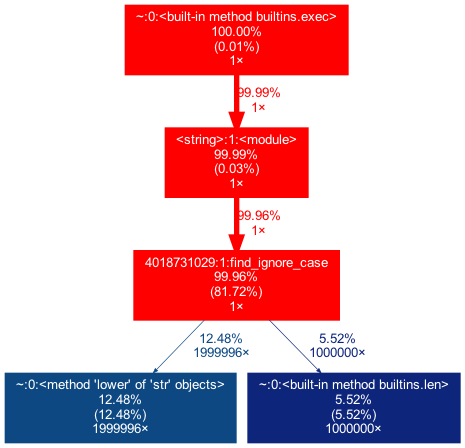

In [48]:
import cProfile
from IPython.display import Image
import subprocess
cProfile.run('find_ignore_case(needle, haystack)', 'find.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './find.pstats', '-o', 'find.dot'])
subprocess.call(['dot', '-Tpng', '-o', 'find.png', 'find.dot' ])
Image('find.png')

In [49]:
def find_ignore_case2( needle, haystack):
    results = []
    needle = needle.lower() # new
    haystack = haystack.lower() # new    
    for hi in range(len(haystack)-len(needle)):
        match = True        
        if haystack[hi] == needle[0]:            
            for ni in range(len(needle)-1): 
                h = haystack[hi + ni]#.lower()
                n = needle[ni]#.lower()
                if h != n: 
                    match=False
                    break # new
            if match:
                results.append(hi)
    return results

random.seed(1)  
sz=1000000
haystack = random_str(sz)
needle = haystack[int(sz/2):int(sz/2)+2]

start_time = time.time()
results = find_ignore_case(needle, haystack)
end_time = time.time()
print("Find: %f seconds" % (end_time - start_time))

start_time = time.time()
results = find_ignore_case2(needle, haystack)
end_time = time.time()
print("Find2: %f seconds" % (end_time - start_time))


Find: 0.266739 seconds
Find2: 0.057562 seconds


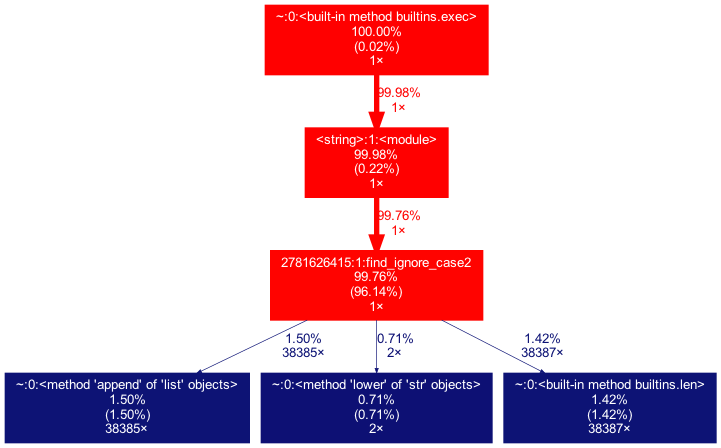

In [27]:
import cProfile
from IPython.display import Image
import subprocess
cProfile.run('find_ignore_case2(needle, haystack)', 'find.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './find.pstats', '-o', 'find.dot'])
subprocess.call(['dot', '-Tpng', '-o', 'find.png', 'find.dot' ])
Image('find.png')

In [57]:
def find_ignore_case3( needle, haystack):
    results = []
    needle = needle.lower() # new
    haystack = haystack.lower() # new
    r = range(len(needle)-1) # new
    
    for hi in range(len(haystack)-len(needle)):
        match = True
        
        if haystack[hi] == needle[0]:            
            for ni in r: # update
                h = haystack[hi + ni]#.lower()
                n = needle[ni]#.lower()
                if h != n: 
                    match=False
                    break # new
            if match:
                results.append(hi)
    return results

def find_ignore_case4( needle, haystack):
    results = []
    needle = needle.lower() # new
    haystack = haystack.lower() # new
    r = range(len(needle)-1) # new
    
    for hi in range(len(haystack)-len(needle)):
        #match = False
        
        if haystack[hi] == needle[0]:            
            for ni in r: # update
                h = haystack[hi + ni]#.lower()
                n = needle[ni]#.lower()
                if h == n: # new
                    #match=False
                    results.append(hi) # new
                    break # new
            #if match:
                #results.append(hi)
    return results

def find_ignore_case5( needle, haystack):
    return [haystack.find(needle)]



In [58]:
random.seed(1)  
sz=20
haystack = random_str(sz)
needle = haystack[int(sz/2):int(sz/2)+2]
results = find_ignore_case(needle, haystack)
results2 = find_ignore_case2(needle, haystack)
results3 = find_ignore_case3(needle, haystack)
results4 = find_ignore_case4(needle, haystack)
results5 = find_ignore_case5(needle, haystack)


print (needle)
print (haystack)
print (results)
print (results2)
print (results3)
print (results4)
print (results5)


sk
eiPPzDAnWiskaumnqYpl
[10]
[10]
[10]
[10]
[10]


In [60]:
random.seed(1)  
sz=1000000
haystack = random_str(sz)
needle = haystack[int(sz/2):int(sz/2)+2]

start_time = time.time()
results = find_ignore_case(needle, haystack)
end_time = time.time()
print("Find: %f seconds" % (end_time - start_time))

start_time = time.time()
results = find_ignore_case2(needle, haystack)
end_time = time.time()
print("Find2: %f seconds" % (end_time - start_time))


start_time = time.time()
results = find_ignore_case3(needle, haystack)
end_time = time.time()
print("Find3: %f seconds" % (end_time - start_time))

start_time = time.time()
results = find_ignore_case4(needle, haystack)
end_time = time.time()
print("Find4: %f seconds" % (end_time - start_time))

start_time = time.time()
results = find_ignore_case5(needle, haystack)
end_time = time.time()
print("Find5: %f seconds" % (end_time - start_time))

Find: 0.259516 seconds
Find2: 0.057128 seconds
Find3: 0.053053 seconds
Find4: 0.048197 seconds
Find5: 0.000172 seconds
